## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 5 EXERCISE ANSWERS ##
#### Exercise ####
#### Please refer to module 2 of IntroToClassification - kNN for Tasks 1-8
#### Task 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from pathlib import Path
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "\\data"
print(data_dir)


C:\Users\Max\Downloads\Classification-with-Python-main
C:\Users\Max\Downloads\Classification-with-Python-main\data


#### Task 2
##### Read in our dataset called `'heart_failure_clinical_records_dataset.csv'`. Save it as `ex_data`.
##### Print the head of `ex_data`.
##### Print the type and length of `ex_data`.
##### Save the shape of the dataset into two variables `ex_nrow` and `ex_ncol` and print them.
##### Subset the dataframe to include only numeric and categorical columns.
#### Result:


In [17]:
ex_data = pd.read_csv(str(data_dir)+"/"+ 'heart_failure_clinical_records_dataset.csv')
print(ex_data.head())
print(type(ex_data))
print(len(ex_data))
ex_nrows, ex_ncols = ex_data.shape
print(ex_nrows)
print(ex_ncols)
# Subset data
ex_data = ex_data[['age', 'serum_sodium', 'time', 'platelets', 'ejection_fraction', 'serum_creatinine', 'creatinine_phosphokinase', 'anaemia', 'high_blood_pressure', 'smoking', 'sex', 'diabetes', 'death_event', 'id']]


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  id  
0        0     4            1   1  
1        0     6            1   

#### Task 3
##### Convert the target to binary if it is not already
##### Save the converted data frame as `ex_data` and print its head.
##### Print the converted column.
#### Result:


In [18]:
# Target not binary - calculate the mean and assign the above mean to 1 and below to 0
ex_threshold = np.mean(ex_data['death_event'])
ex_data['death_event'] = np.where(ex_data['death_event'] > ex_threshold, 0,1)
print(ex_data.head())
print(ex_data['death_event'])


    age  serum_sodium  time  platelets  ejection_fraction  serum_creatinine  \
0  75.0           130     4  265000.00                 20               1.9   
1  55.0           136     6  263358.03                 38               1.1   
2  65.0           129     7  162000.00                 20               1.3   
3  50.0           137     7  210000.00                 20               1.9   
4  65.0           116     8  327000.00                 20               2.7   

   creatinine_phosphokinase  anaemia  high_blood_pressure  smoking  sex  \
0                       582        0                    1        0    1   
1                      7861        0                    0        0    1   
2                       146        0                    0        1    1   
3                       111        1                    0        0    1   
4                       160        1                    0        0    0   

   diabetes  death_event  id  
0         0            0   1  
1         0 

#### Task 4
##### Check for NAs in `ex_data`
##### Fill NAs in `ex_data` with mean.
##### Delete columns containing either 50% or more than 50% NaN Values
#### Result:


In [19]:
 # Check for NAs. 
print(ex_data.isnull().sum())
ex_percent_missing = ex_data.isnull().sum() * 100 / len(ex_data)
print(ex_percent_missing)
ex_perc = 50.0
ex_min_count =  int(((100-ex_perc)/100)*ex_data.shape[0] + 1)
ex_data = ex_data.dropna(axis=1, 
               thresh=ex_min_count)
print(ex_data.shape)


age                         0
serum_sodium                0
time                        0
platelets                   0
ejection_fraction           0
serum_creatinine            0
creatinine_phosphokinase    0
anaemia                     0
high_blood_pressure         0
smoking                     0
sex                         0
diabetes                    0
death_event                 0
id                          0
dtype: int64
age                         0.0
serum_sodium                0.0
time                        0.0
platelets                   0.0
ejection_fraction           0.0
serum_creatinine            0.0
creatinine_phosphokinase    0.0
anaemia                     0.0
high_blood_pressure         0.0
smoking                     0.0
sex                         0.0
diabetes                    0.0
death_event                 0.0
id                          0.0
dtype: float64
(299, 14)


#### Task 5
##### Write a function to impute NA in both numeric and categorical columns
##### Use the function to impute NA
#### Result:


In [20]:
def fillna(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric = df.select_dtypes(include=numerics)
    df_non_numeric = df.select_dtypes(exclude=numerics)
    df_numeric = df_numeric.fillna(df_numeric.mean())
    for column in df_non_numeric.columns:
        df_non_numeric[column].fillna(df_non_numeric[column].mode()[0], inplace=True)
    df = pd.concat([df_numeric, df_non_numeric], axis=1)
    return df
  
ex_data = fillna(ex_data)


#### Task 6
##### Convert `death_event` to `bool` dtype so that is a binary class
#### Result:


In [21]:
# Identify the the two unique classes
ex_unique_values = sorted(ex_data['death_event'].unique())
ex_data['death_event'] = np.where(ex_data['death_event'] == ex_unique_values[0], False,True)


#### Task 7
##### Split the data into ex_X and ex_y 
##### Convert categorical data in ex_X to integer values (Hint: use `get_dummies`)
#### Result:


In [22]:
ex_columns_to_drop_from_X = ['death_event'] + ['id']
ex_X = ex_data.drop(ex_columns_to_drop_from_X, axis = 1)
ex_y = np.array(ex_data['death_event'])
ex_X = pd.get_dummies(ex_X, columns = ['anaemia', 'high_blood_pressure', 'smoking', 'sex', 'diabetes'], dtype=float, drop_first=True)
print(ex_X.dtypes)


age                         float64
serum_sodium                  int64
time                          int64
platelets                   float64
ejection_fraction             int64
serum_creatinine            float64
creatinine_phosphokinase      int64
anaemia_1                   float64
high_blood_pressure_1       float64
smoking_1                   float64
sex_1                       float64
diabetes_1                  float64
dtype: object


#### Task 8
##### Set a seed value
##### Split data into train and test 
##### Scale our X and y predictors separately
#### Result:


In [23]:
# Set the seed.
np.random.seed(1)
# Split into train and test.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, 
                                                    ex_y, 
                                                    test_size = 0.3) 
# Scale X.
ex_X_train = scale(ex_X_train)
ex_X_test = scale(ex_X_test)


#### Please refer to module 3 of IntroToClassification - kNN for Tasks 9-13
#### Task 9
##### Set `default = 5`
##### Create kNN classifier
##### Fit the classifier to the data
##### Predict using the classifier and call it predictions
#### Result:


In [24]:
# Create kNN classifier.
ex_default = 5
ex_kNN = KNeighborsClassifier(n_neighbors = ex_default)
# Fit the classifier to the data.
ex_kNN.fit(ex_X_train, ex_y_train)
ex_predictions = ex_kNN.predict(ex_X_test)
print(ex_predictions)


[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True False]


#### Task 10
##### Print the vector of predicted values versus actual values
##### function called `confusion_matrix` from `sklearn.metrics` 
#### Result:


In [25]:
ex_actual_v_predicted = np.column_stack((ex_y_test, ex_predictions))
print(ex_actual_v_predicted[0:5])


[[ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]]


#### Task 11
##### Print the vector of predicted values versus actual values
##### Use function called `confusion_matrix` from `sklearn.metrics` 
##### Using `accuracy_score` from `sklearn.metrics` calculate the accuracy score
#### Result:


In [26]:
ex_actual_v_predicted = np.column_stack((ex_y_test, ex_predictions))
print(ex_actual_v_predicted[0:5])
print(round(accuracy_score(ex_y_test, ex_predictions), 4))


[[ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]]
0.7667


#### Task 12
##### Create `ex_cm_kNN` a confusion matrix and print it
##### Visualize our confusion matrix
#### Result:


[[ 9 17]
 [ 4 60]]


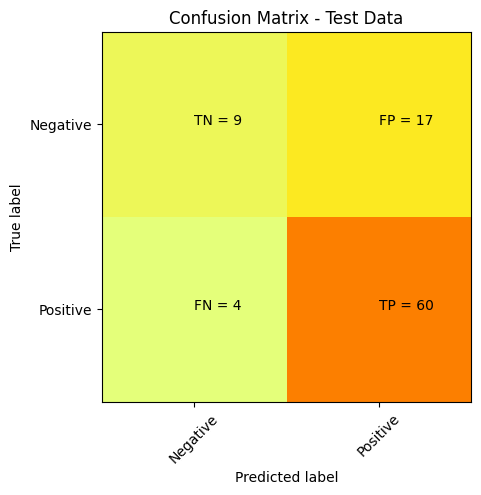

In [27]:
ex_cm_kNN = confusion_matrix(ex_y_test, ex_predictions)
print(ex_cm_kNN)
plt.imshow(ex_cm_kNN, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(ex_cm_kNN[i][j]))
plt.show()


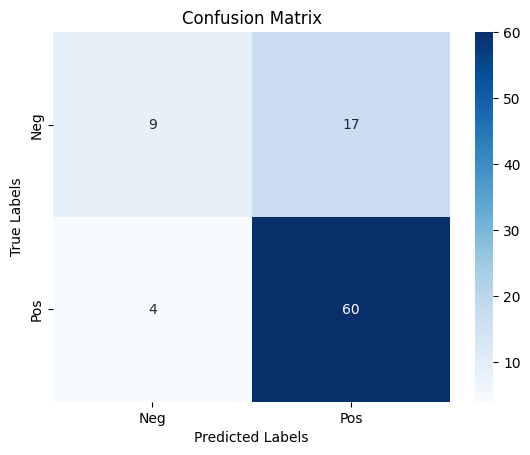

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example true and predicted labels
# y_true = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1]  # True labels
# y_pred = [0, 1, 0, 1, 0, 0, 1, 0, 1, 1]  # Predicted labels

# Generate the confusion matrix
cm = confusion_matrix(ex_y_test, ex_predictions)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])

# Add labels, title, and formatting
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### Task 13
##### Plot the ROC for our model
##### Calculate the AUC
#### Result:


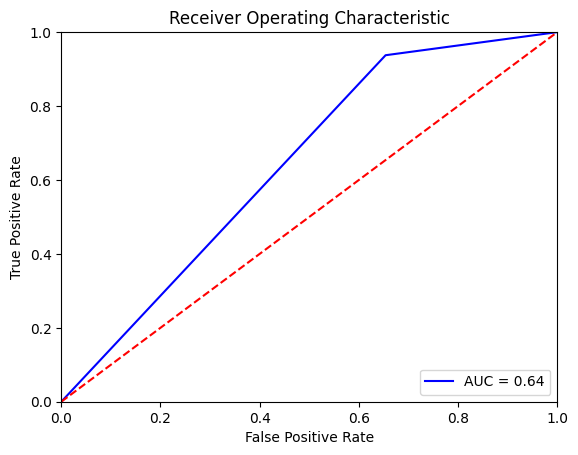

In [28]:
# Store FPR, TPR, and threshold as variables.
ex_fpr, ex_tpr, ex_threshold = metrics.roc_curve(ex_y_test, ex_predictions)
# Store the AUC.
ex_roc_auc = metrics.auc(ex_fpr, ex_tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(ex_fpr, ex_tpr, 'b', label = 'AUC = %0.2f' % ex_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Please refer to module 4 of IntroToClassification - kNN for Task 14
#### Task 14
##### Create a pipeline of the scaler and Estimator
##### Calculate cv scores and print the mean
#### Result:


In [29]:
# Create a pipeline of the scaler and Estimator
ex_cv_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', ex_kNN)])
ex_cv_scores = cross_val_score(ex_cv_pipeline, ex_X, ex_y, cv = 5)
print(ex_cv_scores)
print("cv_scores mean:{}".format(np.mean(ex_cv_scores)))
ex_mean = np.mean(ex_cv_scores)
print("Optimal cv score is:", round(ex_mean, 4))


[0.71666667 0.78333333 0.71666667 0.73333333 0.69491525]
cv_scores mean:0.7289830508474576
Optimal cv score is: 0.729


#### Please refer to module 5 of IntroToClassification - kNN for Tasks 15-19
#### Task 15
#####  Define the parameter values between 1 and 31 that should be searched as `k_range`
##### Create a parameter grid: map the parameter names to the values that should be searched by building a Python dictionary. 
##### Instantiate the grid using our original model - kNN with k and call it as `grid`
#### Result:


In [30]:
# Define the parameter values that should be searched.
ex_k_range = list(range(1, 31))
# Create a parameter grid: map the parameter names to the values that should be searched by building a Python dictionary.
ex_param_grid = dict(n_neighbors = ex_k_range)
print(ex_param_grid)
# Instantiate the grid using our original model - kNN with k.
ex_grid = GridSearchCV(ex_kNN, ex_param_grid, cv = 10, scoring = 'accuracy')


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


#### Task 16
##### Create a pipeline of the scaler and gridsearch as `grid_search_pipeline`
##### Fit Gridsearch pipeline
##### Print the complete results (list of named tuples).
#### Result:


In [31]:
# Create a pipeline of the scaler and gridsearch
ex_grid_search_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', ex_grid)])
# Fit Gridsearch pipeline
ex_grid_search_pipeline.fit(ex_X, ex_y)
# View the complete results (list of named tuples).
print(ex_grid.cv_results_['mean_test_score'])


[0.65229885 0.6454023  0.70908046 0.72908046 0.74574713 0.75574713
 0.74908046 0.75241379 0.73908046 0.74241379 0.74574713 0.75574713
 0.72908046 0.75241379 0.73574713 0.75241379 0.73908046 0.74908046
 0.74241379 0.76241379 0.73241379 0.75908046 0.73896552 0.74574713
 0.73896552 0.73908046 0.73574713 0.73908046 0.74229885 0.73563218]


#### Task 17
##### Create a list of the mean scores only by using a list comprehension to loop through grid.cv_results_ and print it.
##### Plot optimal k - plot, by plotting k_range with grid_mean_scores
#### Result:


[np.float64(0.6522988505747126), np.float64(0.6454022988505747), np.float64(0.7090804597701149), np.float64(0.729080459770115), np.float64(0.7457471264367816), np.float64(0.7557471264367817), np.float64(0.749080459770115), np.float64(0.7524137931034482), np.float64(0.739080459770115), np.float64(0.7424137931034483), np.float64(0.7457471264367816), np.float64(0.7557471264367817), np.float64(0.7290804597701149), np.float64(0.7524137931034482), np.float64(0.7357471264367816), np.float64(0.7524137931034482), np.float64(0.739080459770115), np.float64(0.749080459770115), np.float64(0.7424137931034483), np.float64(0.7624137931034483), np.float64(0.7324137931034483), np.float64(0.7590804597701151), np.float64(0.7389655172413793), np.float64(0.7457471264367816), np.float64(0.7389655172413793), np.float64(0.739080459770115), np.float64(0.7357471264367816), np.float64(0.739080459770115), np.float64(0.7422988505747126), np.float64(0.735632183908046)]


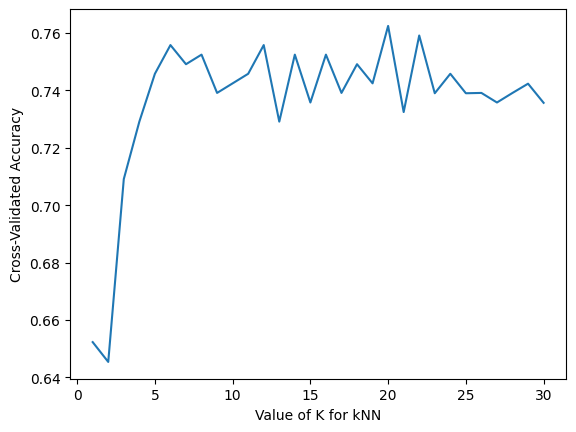

In [32]:
ex_grid_mean_scores = [result for result in ex_grid.cv_results_['mean_test_score']]
print(ex_grid_mean_scores)
# Plot the results.
plt.plot(ex_k_range, ex_grid_mean_scores)
plt.xlabel('Value of K for kNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


#### Task 18
##### Print the vector of predicted values versus actual values
##### function called `confusion_matrix` from `sklearn.metrics` 
#### Result:


In [33]:
ex_actual_v_predicted = np.column_stack((ex_y_test, ex_predictions))
print(ex_actual_v_predicted[0:5])


[[ True  True]
 [ True  True]
 [False  True]
 [ True  True]
 [ True  True]]


#### Task 19
##### Print the single best score achieved across all params (k).
##### Print the dictionary containing the parameters (k) used to generate that score.
##### Actual model object fit with those best parameters (Hint: use best_estimator_)
#### Result:


In [34]:
# Single best score achieved across all params (k).
print(ex_grid.best_score_)
# Dictionary containing the parameters (k) used to generate that score.
print(ex_grid.best_params_)
# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(ex_grid.best_estimator_)


0.7624137931034483
{'n_neighbors': 20}
KNeighborsClassifier(n_neighbors=20)


In [ ]:
# pickle the model (serialize)

pickle.dump()